In [1]:
import numpy as np

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print(f'Class Labels: {np.unique(y)}')

Class Labels: [0 1 2]


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.01, random_state=1)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print(f'Misclassified examples: {(y_test != y_pred).mean()}')

Misclassified examples: 0.13333333333333333


In the following section we only choose two classes from the dataset to check our Logistic Regression implementation

In [6]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

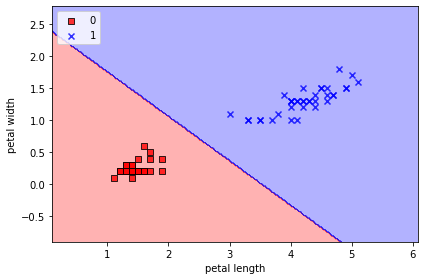

In [7]:
from lr import LogisticRegressionGD
from helper import plot_decision_regions
import matplotlib.pyplot as plt

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)

plot_decision_regions(X=X_train_01_subset,
                     y=y_train_01_subset,
                     classifier=lrgd)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()